<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [ ]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = ''
USER = ''
PASSWORD = ''
HOST = ''
PORT = 5432

In [8]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
select count(id) as vacancies_total
from vacancies
'''

In [13]:
# результат запроса
df = pd.read_sql(query_3_1, connection)
# у нас всего 1 ячейка с данными, обратимся к ней по индексам
print(f'количество вакансий: {df.iloc[0,0]}')

количество вакансий: 49197


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_27453/3511603451.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_1, connection)


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [5]:
# текст запроса
query_3_2 = f'''
select count(id) as total
from employers
'''

In [6]:
# результат запроса
df = pd.read_sql(query_3_2, connection)
print(f'количество работодателей: {df.iloc[0,0]}')

количество работодателей: 23501


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/3722674907.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_2, connection)


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [7]:
# текст запроса
query_3_3 = f'''
select count(id) as areas_total
from areas
'''

In [8]:
# результат запроса
df = pd.read_sql(query_3_3, connection)
print(f'количество регионов: {df.iloc[0,0]}')

количество регионов: 1362


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/1060876410.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_3, connection)


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [9]:
# текст запроса
query_3_4 = f'''
select count(id) as industries_total
from industries
'''

In [10]:
# результат запроса
df = pd.read_sql(query_3_4, connection)
print(f'количество сфер деятельности: {df.iloc[0,0]}')

количество сфер деятельности: 294


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/3081679043.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_4, connection)


***

In [ ]:
# выводы по предварительному анализу 

# В БД представлены 49197 вакансии у 23501 работодателей, те, в среднем, примерно по 2 вакансии на компанию.

# Сделаем дополнительный запрос к БД и посмотрим на топ 10 компаний по количеству вакансий, а так же 
# выведем количество регионов, в которых эти компании ищут сотрудников.

query_3_final='''
select e.name as employer_name, count(v.id) as total_by_employer, count(distinct area_id) as total_areas
from vacancies v
    join employers e on e.id = v.employer_id
group by e.id
order by total_by_employer desc
limit 10
'''
df = pd.read_sql(query_3_final, connection)
display(df)

# Видим, что некоторые крупные компании (Яндекс, Ростелеком) предлагают большее количество локаций, для работы. 
# Однако, нельзя сказать, что есть прямая связь между размером компании и локациями. 
# Например, СБЕР ищет сотрудников только в 24 регионах, а МТС - 55.

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_1997/3490785352.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_final, connection)


,employer_name,total_by_employer,total_areas
0,Яндекс,1933,181
1,Ростелеком,491,152
2,Тинькофф,444,43
3,СБЕР,428,24
4,Газпром нефть,331,24
5,ИК СИБИНТЕК,327,46
6,МТС,292,55
7,DataArt,247,2
8,Совкомбанк Технологии,204,26
9,Первый Бит,176,43


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1=f'''
select a.id as area_id, a.name as area_name, count(v.id) as vacancies_in_area
from vacancies as v
    join areas as a on a.id = v.area_id
group by a.id
order by vacancies_in_area desc
'''

In [13]:
# результат запроса
df = pd.read_sql(query_4_1, connection)
display(df.head(5))

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/3762955335.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_1, connection)


,area_id,area_name,vacancies_in_area
0,1,Москва,5333
1,2,Санкт-Петербург,2851
2,1002,Минск,2112
3,4,Новосибирск,2006
4,160,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [23]:
# текст запроса
query_4_2=f'''
select count(id) as vacancies_with_salary
from vacancies
where 
    salary_from is not null OR salary_to is not null
'''

In [24]:
# результат запроса
df = pd.read_sql(query_4_2, connection)
print(f'количество вакансий, у которых заполнена одна из границ ЗП: {df.iloc[0,0]}')

количество вакансий, у которых заполнена одна из границ ЗП: 24073


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/3416382441.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_2, connection)


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [28]:
# текст запроса
query_4_3=f'''
select avg(salary_from) as salary_from_avg, avg(salary_to) as salary_to_avg
from vacancies
'''

In [29]:
# результат запроса
df = pd.read_sql(query_4_3, connection)
print(f'средние значения ЗП: нижнее={round(df.iloc[0,0])}, верхняя={round(df.iloc[0,1])}')

средние значения ЗП: нижнее=71065, верхняя=110537


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/384765522.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_3, connection)


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [30]:
# текст запроса
query_4_4=f'''
select schedule, employment, count(id) as total
from vacancies
group by schedule, employment
order by total desc
'''

In [31]:
# результат запроса
df = pd.read_sql(query_4_4, connection)
display(df.head(5))

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/3549246092.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_4, connection)


,schedule,employment,total
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [32]:
# текст запроса
query_4_5=f'''
select experience, count(id) as total
from vacancies
group by experience
order by total asc
'''

In [33]:
# результат запроса
df = pd.read_sql(query_4_5, connection)
display(df.head(5))

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/686799941.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_5, connection)


,experience,total
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

**Выводы**

1. Видим, что безусловным лидером по количеству вакансий является Москва, что ожидаемо. А вот Минск и Алматы в пятерке лидеров говорят о дефиците кадров в этих странах/регионах
2. Границы диапазона ЗП указаны только у 24073 вакансий, те менее 50%. Работодатели предпочитают сопоставлять зарплатные ожидания кандидатов с их навыками по результатам собеседований
3. Так же видим, что работодатели чаще ищут сотрудников с небольшим опытом "От 1 года до 3 лет" на полный рабочий день в офис.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [43]:
# текст запроса

# поскольку нас интересует первое и пятое место, можно воспользоваться одним запросом, ограничив выборку 5 строками
query_5_1=f'''
select e.id as employer_id, e.name as employer_name, count(v.id) as vacancies_by_employer
from vacancies as v
    join employers as e on e.id = v.employer_id
group by e.id
order by vacancies_by_employer desc
limit 5
'''

# другим решением будет использование UNION. при этом, сначала найдем первую и пятую строки, а затем выполним join - это позволит уменьшить нагрузку на сервер БД
query_5_1_union=f'''
select e.name as employer_name, tt.*
from (
    (
        select employer_id, count(id) as vacancies_by_employer, 1 as rank
        from vacancies
        group by employer_id
        order by vacancies_by_employer desc
        limit 1
    ) union all (
        select employer_id, count(id) as vacancies_by_employer, 5
        from vacancies
        group by employer_id
        order by vacancies_by_employer desc
        offset 4
        limit 1
    )
) as tt
    join employers as e on e.id = tt.employer_id
order by tt.vacancies_by_employer desc
'''

In [44]:
# результат запроса
df = pd.read_sql(query_5_1, connection)
display(df.head(5))

df = pd.read_sql(query_5_1_union, connection)
display(df.head())

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/2434476905.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_1, connection)


,employer_id,employer_name,vacancies_by_employer
0,1740,Яндекс,1933
1,2748,Ростелеком,491
2,78638,Тинькофф,444
3,3529,СБЕР,428
4,39305,Газпром нефть,331


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/2434476905.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_1_union, connection)


,employer_name,employer_id,vacancies_by_employer,rank
0,Яндекс,1740,1933,1
1,Газпром нефть,39305,331,5


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [48]:
# текст запроса
query_5_2=f'''
select a.name, count(e.id) as employers_total, count(v.id) as vacancies_total
from areas a
    join employers e on e.area = a.id
    left join vacancies v on v.area_id = a.id
group by a.id
order by vacancies_total asc, employers_total desc
'''

In [50]:
# результат запроса
df = pd.read_sql(query_5_2, connection)
display(df.head(5))

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/2632467482.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_2, connection)


,name,employers_total,vacancies_total
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [52]:
# текст запроса
query_5_3='''
select e.name as employer_name, count(distinct v.area_id) as total_unique_areas
from vacancies v
    join employers e on e.id = v.employer_id
group by e.id
order by total_unique_areas desc
'''

In [53]:
# результат запроса
df = pd.read_sql(query_5_3, connection)
display(df.head())

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/2011413715.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_3, connection)


,employer_name,total_unique_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [56]:
# текст запроса
query_5_4='''
select count(e.id) as total_employers_no_industries
from employers e
    left join employers_industries empl_link on e.id = empl_link.employer_id
where empl_link.employer_id is null
'''

In [ ]:
# результат запроса
df = pd.read_sql(query_5_4, connection)
print(f'количества работодателей, у которых не указана сфера деятельности: {df.iloc[0,0]}')

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/1889896198.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_4, connection)


количества работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [67]:
# текст запроса
query_5_5='''
select e.name
from employers e
    join employers_industries empl_link on e.id = empl_link.employer_id
group by e.id
having count(empl_link.industry_id) = 4
order by e.name asc
offset 2
limit 1
'''

In [69]:
# результат запроса
df = pd.read_sql(query_5_5, connection)
print(f'Компания, находящаяся на третьем месте в алфавитном списке (по названию), у которой указано четыре сферы деятельности: {df.iloc[0,0]}')

Компания, находящаяся на третьем месте в алфавитном списке (по названию), у которой указано четыре сферы деятельности: 2ГИС


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/53838477.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_5, connection)


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [70]:
# текст запроса
query_5_6='''
select count(employer_id) as total
from employers_industries
where
    industry_id in (
        select id
        from industries
        where
            name = 'Разработка программного обеспечения'
    )
'''

In [71]:
# результат запроса
df = pd.read_sql(query_5_6, connection)
print(f'количество компаний со сферой деятельности "Разработка программного обеспечения": {df.iloc[0,0]}')

количество компаний со сферой деятельности "Разработка программного обеспечения": 3553


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/1338553619.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_6, connection)


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [85]:
# код для получения списка городов-милионников
import requests 
from bs4 import BeautifulSoup

millionaire_cities = []
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'

response = requests.get(url, headers={'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36'}) 
if response.status_code != 200:
    raise ConnectionError(f"can't load data by URL: {url}")

soap = BeautifulSoup(response.text)
div = soap.find("div", id='mw-content-text')
table = div.find("table", class_='standard')
table_rows = table.find_all("tr")
for row in table_rows:
    if row.find("th"): # skip header cells - <th>
        continue
    
    city_ref = row.find_all("td")[1].find("a")
    millionaire_cities.append(city_ref.text)
print(millionaire_cities)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [ ]:
# текст запроса

# превратим список в строку и удалим первый и последний символы ('[' и ']') - это позволит использовать строку в 'area.name in (...)' фильтре
cities_str = f'{millionaire_cities}'[1:-1]

query_5_7=f'''
(
    select a.name as area_name, count(v.id) as vacancies_total
    from vacancies v
        join areas a on a.id = v.area_id
    where
        a.name in ({cities_str})
        and v.employer_id in (
            select id
            from employers
            where
                name = 'Яндекс'
        )
    group by a.id    
) union all (
    select 'Total' as area_name, count(v.id) as vacancies_total
    from vacancies v
    where
        v.area_id in (
            select a.id
            from areas a
            where a.name in ({cities_str})
        )
        and v.employer_id in (
            select id
            from employers
            where
                name = 'Яндекс'
        )
)
order by vacancies_total asc

'''

In [101]:
# результат запроса
df = pd.read_sql(query_5_7, connection)
display(df)

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/1396084416.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_7, connection)


,area_name,vacancies_total
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

**Выводы**

1. На первом месте по количеству вакакнсий находится Яндекс. Он представлен вакансиями во всех городах миллионниках 
2. Компании, которые занимаются разработкой программного обеспечения, составляют примерно 15% (3553 / 23501 = 0.151185) от всех представленных работодателей
3. Видим и проблемы в данных:
    - 8419 работодателей не заполнена сфера деятельности - это примерно 35% всех работодателей
    - српавочник регионов *areas*, очевидно, требует доработки, потому что в регионе Россия нет ни одной вакансии, но много работодателей. Наличие поля parent_area_id позволило бы стоить дерево регионов и агригировать вакансии/работодателей.

In [ ]:
# выводы по анализу работодателей

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [102]:
# текст запроса
query_6_1='''
select count(id)
from vacancies
where 
    lower(name) like '%data%' OR lower(name) like '%данн%'
'''

In [104]:
# результат запроса
df = pd.read_sql(query_6_1, connection)
print(f'количество вакансий, которые имеют отношение к данным: {df.iloc[0,0]}')

количество вакансий, которые имеют отношение к данным: 1771


/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/2712608490.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_1, connection)


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [9]:
# текст запроса

# посторим осноной SQL запрос для поиска вакансий для Data Science - воспользуемся циклом. 
# union, чтоб исключить дубликаты
name_shall_contains=['data scientist', 'data science', 'исследователь данных', 'machine learning', 'машинн%обучен']
ds_query_base=''
for val in name_shall_contains:
    ds_query_base += f'''(
        select *
        from vacancies
        where
            lower(name) like '%{val}%'
    ) union
    '''
    
# добавим вакансии для "ML". их нельзя добавить в цикле, тк требуется дополнительная обработка
ds_query_base += '''(
    select *
    from vacancies
    where 
        name like '%ML%' and name not like '%HTML%'
)
order by id
'''

# посмотрим на нашу выборку DS вакансий
ds_vacancies_all = pd.read_sql(ds_query_base, connection)
display(ds_vacancies_all.head())
display(ds_vacancies_all.tail())


query_6_2=f'''
select count(tt.id) as junior_total
from (
{ds_query_base}
) as tt
where
    lower(tt.name) like '%junior%'
    OR experience = 'Нет опыта'
    OR employment = 'Стажировка'
'''

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_1997/3930144239.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_vacancies_all = pd.read_sql(ds_query_base, connection)


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,43183814,Data scientist,Python\tC++\tНаписание статей\tНаписание научн...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,2,4585
1,43366306,Data scientist по построению моделей оценки кр...,Python\tРиск-менеджмент\tМатематическая статис...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,1,4181
2,44095047,Инженер-тестировщик в команду Machine Learning,Python\tGit\tAtlassian Jira\tLinux\tMATLAB,Удаленная работа,От 1 года до 3 лет,Полная занятость,NaN,NaN,4,8550
3,47094497,Data scientist (проект Музыка),SCALA\tSpark\tHadoop\tJava\tBig Data\tPython,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,2,15478
4,47095350,Data scientist (проект Моменты),SCALA\tSpark\tHadoop\tJava\tBig Data\tPython,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,2,15478


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
475,66142163,Junior Data Scientist (математик-аналитик) уда...,SQL\tMS SQL\tУдаленная работа\tPython\tМатемат...,Удаленная работа,От 1 года до 3 лет,Полная занятость,NaN,NaN,1,870069
476,66146489,Data Scientist (Computer Vision),Python\tPyTorch\tOpenCV\tComputer Vision\tTens...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,2,2565797
477,66146610,Автор работ по машинному обучению,None,Удаленная работа,От 1 года до 3 лет,Проектная работа,NaN,90000.0,72,11463
478,66178607,ML инженер / Data Scientist,Python\tPostgreSQL\tPyTorch\tTensorflow\tPanda...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,1,2622045
479,66185427,Специалист по Data Science,Python\tLinux\tАнализ данных\tKeras\tData Scie...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,53,3403332


In [266]:
# результат запроса
df = pd.read_sql(query_6_2, connection)
print(f'количество вакансий для начинающего дата-сайентиста: {df.iloc[0,0]}')

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/1810566152.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_2, connection)


количество вакансий для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [267]:
# текст запроса

# поскольку навыки разделены символом табуляции ('\t'), добавим такой символ в начало и конец key_skills и поищем навыки с учетом разделителей
query_6_3=f'''
select count(id) as total
from (
{ds_query_base} 
) as tt
where
    '\t'||lower(tt.key_skills)||'\t' like '%\tsql\t%'
    OR '\t'||lower(tt.key_skills)||'\t' like '%\tpostgres\t%'
'''

In [268]:
# результат запроса
df = pd.read_sql(query_6_3, connection)
print(f'количество DS вакансий, в которых в качестве ключевого навыка указан SQL или postgres: {df.iloc[0,0]}')

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/3060996577.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_3, connection)


количество DS вакансий, в которых в качестве ключевого навыка указан SQL или postgres: 191


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [269]:
# текст запроса
query_6_4=f'''
select count(id) as total
from (
{ds_query_base} 
) as tt
where
    '\t'||lower(tt.key_skills)||'\t' like '%\tpython\t%'
'''

In [270]:
# результат запроса
df = pd.read_sql(query_6_4, connection)
print(f'количество DS вакансий, в которых в качестве ключевого навыка указан Python: {df.iloc[0,0]}')

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/865730990.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_4, connection)


количество DS вакансий, в которых в качестве ключевого навыка указан Python: 348


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [271]:
# текст запроса

# посчитаем количество навыков, как количество символов табуляции '\t' + 1, потому что
#  - один навык - это 0 символов \t
#  - два навыка - это 1 символ-разделитель
#  - и тд

# для подсчета количества символов-разделителей, заменим их на пустую строку/символ и найдем разницу длин строк
query_6_5=f'''
select avg(1 + length(key_skills) - length(replace(key_skills, '\t', '')))
from (
{ds_query_base} 
) as tt
'''

In [272]:
# результат запроса
df = pd.read_sql(query_6_5, connection)
print('Среднее количество навыков:', round(df.iloc[0,0], 2))

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/1444456069.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_5, connection)


Среднее количество навыков: 6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [280]:
# текст запроса
query_6_6=f'''
select experience, round(avg((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from)) / 2.0), 2) as avg_salary
from (
    {ds_query_base}
) as tt
where
    salary_from is not null OR salary_to is not null
group by experience
'''

In [285]:
# результат запроса
df = pd.read_sql(query_6_6, connection, index_col='experience')
display(df.head())

print('Средняя ЗП для DS-специалиста с опытом от 3 до 6 лет: ', round(df['avg_salary'].loc['От 3 до 6 лет']))

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_53956/2844861341.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_6, connection, index_col='experience')


,avg_salary
experience,
Нет опыта,74642.86
От 1 года до 3 лет,139674.75
От 3 до 6 лет,243114.67


Средняя ЗП для DS-специалиста с опытом от 3 до 6 лет:  243115


***

**Выводы**

1. Видим, что ЗП data scientist специалиста увеличивается примерно в 2 раза, каждые 3 года опыта - это приятно!
2. С другой стороны, из 480 DS-вакансий (см *ds_query_base* и его результаты), для начинающего DS-специалиста имеется всего 51 позиция - не много.
3. Из основных навыков, которые требуются DS-специалисту, Python указан в 348 объявлениях, а SQL - в 191. 

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

# Мы имеем таблицу ds_vacancies_all со всеми вакансиями data science
# Мы знаем, что в среднем 6.41 навыка указывают работодатели в объявлении. Давайте посмотрим какие ключевые навыки спрашивают работодатели.
# Для этого создадим признаки-мигалки для каждого навыка

def extract_unique_values(column_data: pd.Series) -> set:
    '''
    Метод создает set уникальных значений (строк) для переданной колонки.
    Пример: допустим у нас есть 2 строки в переданном Series
        - "Python\tGit\tMATLAB"
        - "Python\tSQL"
        
    на выходе мы ожидаем set значений: {'Python', 'Git', 'MATLAB', 'SQL'}
    '''
    
    res = set()
    for str in column_data:
        terms = str.split('\t')
        for t in terms: res.add(t.strip().lower())
    return res

# исключим строки с незаполненными key_skills
ds_vacancies_filtered = ds_vacancies_all[ds_vacancies_all['key_skills'].notna()]

# извлечем все навыки. это будут имена колонок с признаками-мигалками
skills = extract_unique_values(ds_vacancies_filtered['key_skills'])
# вычислим значения колонок
for skill in skills:
    ds_vacancies_filtered[skill] = ds_vacancies_filtered['key_skills'].apply(lambda x: ('\t'+str(x).lower()+'\t').find('\t'+skill+'\t') >= 0)

/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_1997/2806672353.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_vacancies_filtered[skill] = ds_vacancies_filtered['key_skills'].apply(lambda x: ('\t'+str(x).lower()+'\t').find('\t'+skill+'\t') >= 0)
/var/folders/px/9gpld6995cq9blfwdmwgbkrw0000gn/T/ipykernel_1997/2806672353.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_vacancies_filtered[skill] = ds_vacancies_filtered['key_skills'].apply(lambda x: ('\t'+str(x).lower()+'\t').find('\t

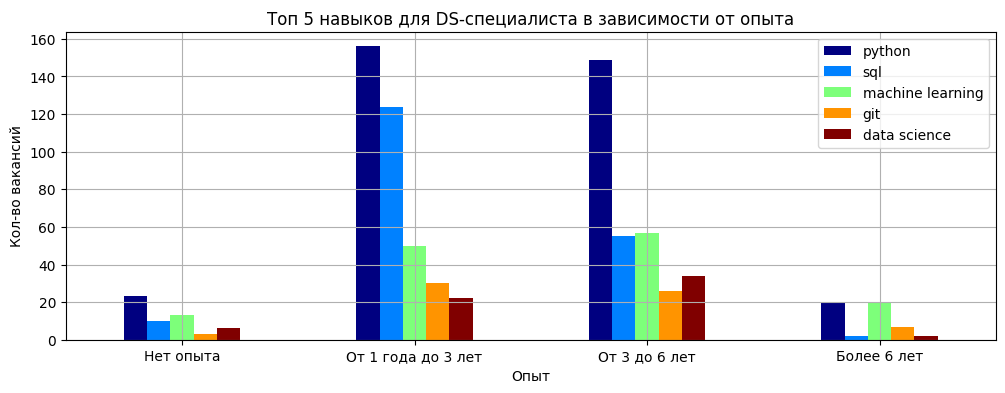

In [47]:
number_of_skills_to_display = 5
colormap_def = 'jet'

# посчитаем количество каждого навыка
skills_totals = ds_vacancies_filtered[[*skills]].sum()
skills_totals.sort_values(ascending=False, inplace=True)

# выведем первые N скилов
# display(skills_totals[:number_of_skills_to_display])

# сформируем спосик из названий навыков, входящих в топ N по количеству упоминаний
top_skills_names = list(skills_totals[:number_of_skills_to_display].index)

# теперь сгруппируем по опыту работы и посчитаем сумму по каждой колонке для топ N навыковых
ds_vacancies_by_expirience = ds_vacancies_filtered[['experience', *top_skills_names]].groupby('experience').sum()

# перестроим категориальный индекс и отсортируем
ds_vacancies_by_expirience.index = pd.CategoricalIndex(ds_vacancies_by_expirience.index, categories=['Нет опыта','От 1 года до 3 лет','От 3 до 6 лет','Более 6 лет'])
ds_vacancies_by_expirience.sort_index(level=0, ascending=True, inplace=True)

# построим график
ax = ds_vacancies_by_expirience.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap=colormap_def,
    title=f"Топ {number_of_skills_to_display} навыков для DS-специалиста в зависимости от опыта",
    ylabel="Кол-во вакансий",
    xlabel='Опыт'
)
ax.tick_params(axis='x', labelrotation=0)

**Выводы**

Из графика видим, что для специальистов с опытом от 1 года до 6 лет, Python, SQL, Machine Learning и GIT являются необходимым набором знаний для вакансий в data science.
При этом SQL более важен для специальистов с опытом от 1 года до 3 лет, это может быть связано с тем, что такие специалисты чаще занимаются подготовкой данных для последующего обучения моделей. Тогда как специалисты от 3 до 6 лет опыта скорее занимаются проектированием и обучением моделей, чем предварительным анализом данных.

Кроме того, можно было бы посмотреть на эту же таблицу в относительной шкале, те посчитать % вакансий, в которых требуется тот или иной навык, относительно общего количества вакансий для данного опыта работы.